#05. 트리알고리즘 

로지스틱 회귀로 와인 분류하기 

In [50]:
#데이터 셋 불러오기 
import pandas as pd 
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [51]:
#와인 데이터셋을 데이터프레임으로 제대로 읽어 들였는지 head()메서드로 5개의 샘플 확인 
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


데이터 셋 설명 

alcohol = 알코올 도수 

sugar = 당도 

pH = pH값 

class = 타깃 값으로 0이면 레드와인, 1이면 화이트 와인 

In [52]:
#데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB



=> 총 6,497개의 샘플이 있고 4개의 열은 모두 실숫값 
Non-Null Count가 모두 6497이므로 누락된 값 없음

In [53]:
#열에 대한 간략한 통계를 출력 (최소,최대,평균값)

wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


mean- 평균 

std - 표준편차 

min - 최소 

25% - 1사분위수 

50% - 중간값/ 2사분위수 

75% - 3사분위수 

max - 최대

In [54]:
# 알콜 도수, 당도, pH 값의 스케일이 다르기에 특성 표준화 

#먼저 넘파이 배열로 바꾸기 
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target= wine['class'].to_numpy()

In [55]:
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [56]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [57]:
#훈련세트와 테스트 세트로 나눠주기 

from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state =42
)

train_test_splt()함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정

샘플개수가 충분히 많으므로 20%정도만 테스트 세트로 나눴음=> test_size =0.2 

In [58]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


훈련세트는 5197개, 테스트 세트는 1300개 

In [59]:
#StandardScaler 클래스를 사용해 훈련세트를 전처리 

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled= ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [60]:
from pandas.core.indexers import length_of_indexer
#표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀모델을 훈련 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


훈련 세트와 테스트 세트의 점수의 점수가 모두 낮으니 모델이 과소적합됨 
이 문제를 해결하기 위해 규제변수의 값 C의 값을 변경 or solver 매개변수에 다른 알고리즘을 선택하거나 다항 특성을 만들어서 추가할 수 있음

In [61]:
#로지스틱 회귀가 학습한 계수와 절편 출력 

print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


모델이 왜 저런 계수값을 내었는지 모르겠다 

=> 아마도 알콜 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, pH가 높을수록 레드와인일 가능성이 높음 

In [62]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

# 훈련 세트 
print(dt.score(train_scaled, train_target)) 
# 테스트 세트 
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


훈련 세트에 대한 점수가 높기 때문에 거의 맞춘것으로 볼 수 있음 

테스트 세트의 성능은 그에 비해 낮음 
따라서 과대적합된 모델이라고 볼 수 있음 

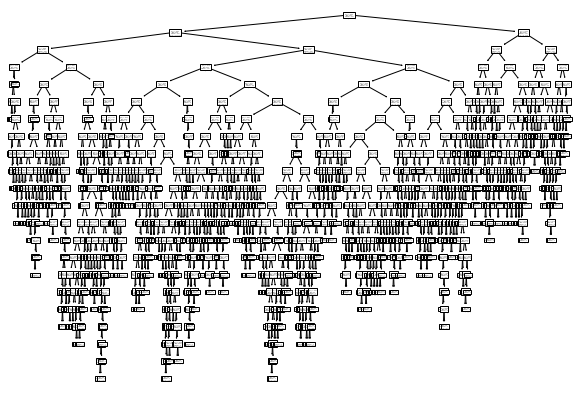

In [42]:
#모델을 결정 트리 그림으로 출력하기 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

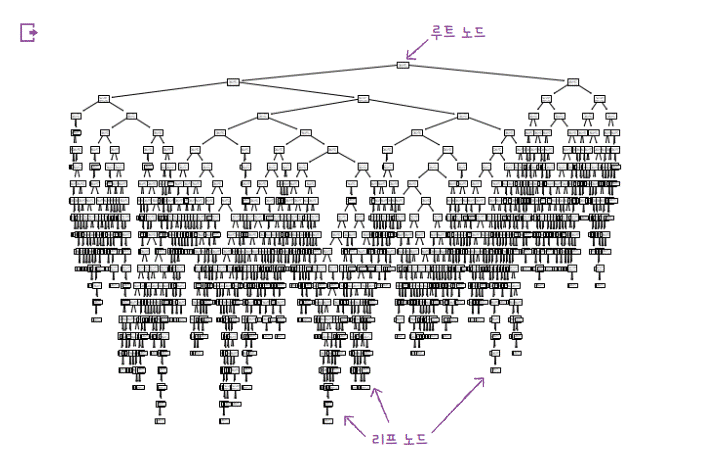

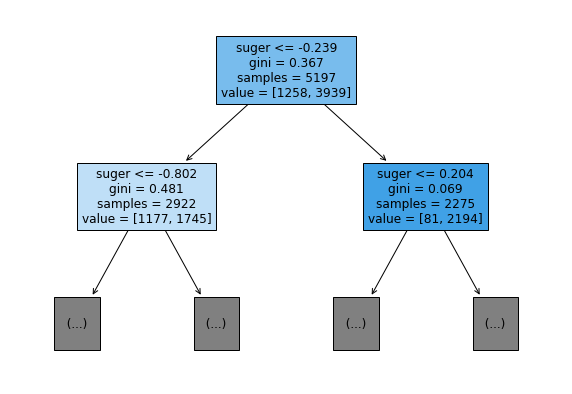

In [43]:
#트리의 깊이를 제한해서 출력 

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','suger','pH'])
plt.show()

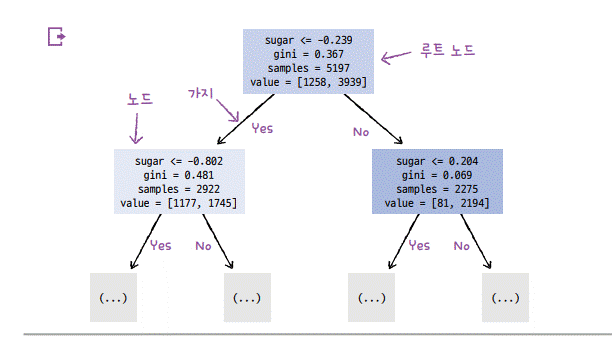

테스트 조건(suger)

불순도(gini)

총 샘플 수(sample)

클래스별 샘플 수(value)

조건 만족 yes 

조건 불만족 no

그래프 해석 

루트 노드-

당도가 -0.239 이하이면 왼쪽(yes), 오른쪽(no)로 이동하여라. 
루트 노드의 총 샘플수는 5,197개 
이 중 음성 클래스(레드와인)은 1,258개 
양성 클래스(화이트 와인)는 3,939개 


왼쪽 노드-
당도가 -0.802와 같거나 낮다면 다시 왼쪽가지(yes), 그렇지 않다면 오른쪽 가지(no)로 이동하여라.
이 중 음성 클래스는 1,177개,
양성 클래스는 1,745개

오른쪽 노드-
당도가 0.204보다 같거나 낮다면 왼쪽가지로, 그렇지 않다면 오른쪽 가지로 이동하여라.
이 중 음성 클래스는 81개, 
양성 클래스는 2,194개


-> 왼쪽 노드에 도달한 샘플, 오른쪽 노드에 도달한 샘플은 모드 양성클래스로 예측된다 
왜냐하면 두 노드 모두 양성 클래스의 개수가 많기 때문임 

In [44]:
dt= DecisionTreeClassifier(max_depth=3  #깊이 3
                           , random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로임을 확인 할 수 있었음

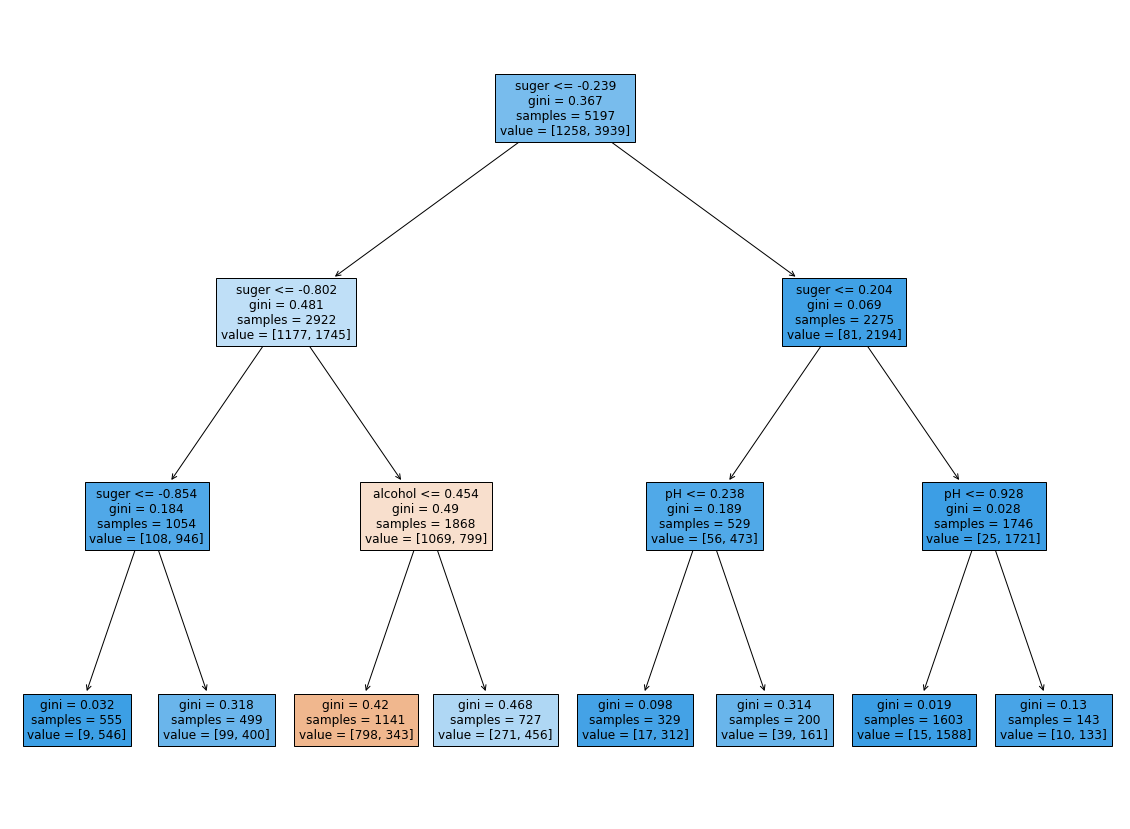

In [45]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'suger', 'pH'])
plt.show()

깊이 1의 노드는 당도 기준으로 훈련세트를 나눔 

깊이 2의 노드는 맨 왼쪽의 노드만 당도를 기준으로 나누고 왼쪽에서 두 번째 노드는 알코올 도수를 기준으로 나눔, 오른쪽의 두 노드는 pH를 사용 

깊이 3에 있는 노드는 왼쪽에서 세번째에 있는 노드만 음성 클래스가 더 많음으로 레드와인으로 예측한다 

레드와인은 당도가 -0.802보다 크고 -0.239보다 작은 와인 중에 알코올 도수가 0.454와 같거나 작은 것


In [46]:
#훈련세트와 테스트세트로 결정 트리 모델을 다시 훈련 

dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


위의 결과와 같다 

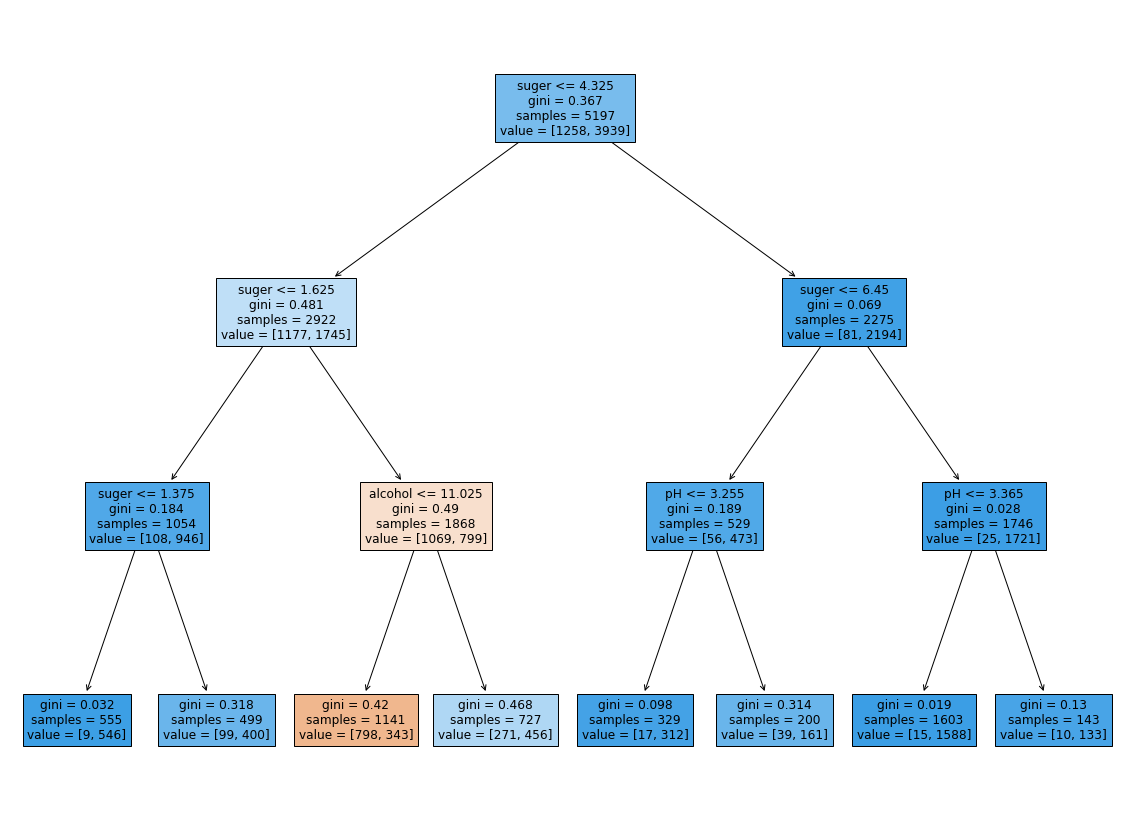

In [47]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','suger','pH'])
plt.show()

당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작은 것이 레드와인, 그외는 화이트와인이다.

In [48]:
#특성 중요도 

print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


출력된 값은 

[0.12345626 0.86862934 0.0079144 ] 으로, 

['alcohol','suger','pH']을 말한다 

당도, 알콜도수, pH순으로 특성중요도가 나타난다는 것을 알 수 있다


#확인문제 3 

In [64]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


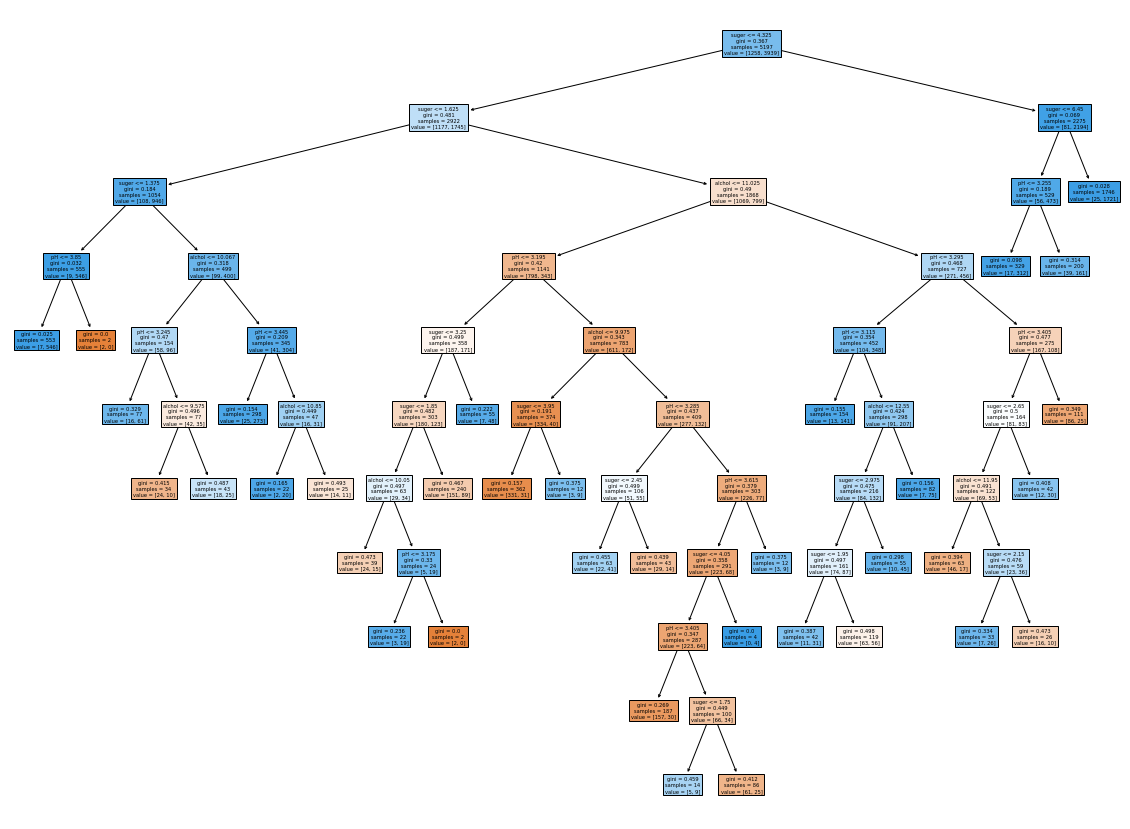

In [68]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol','suger','pH'])
plt.show()